This notebook contains plots of various statistical and systems metrics gathered from the last run

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import visualization_utils
import math
import seaborn as sns
import numpy as np

In [2]:
from baseline_constants import (
    ACCURACY_KEY,
    BYTES_READ_KEY,
    BYTES_WRITTEN_KEY,
    CLIENT_ID_KEY,
    LOCAL_COMPUTATIONS_KEY,
    NUM_ROUND_KEY,
    NUM_SAMPLES_KEY)

def plot_accuracy_vs_round_number(realx_axis_values, 
                                  realy_axis_values,
                                  leafx_axis_values, 
                                  leafy_axis_values, 
                                  atype, 
                                  weighted=False, figsize=(10, 8), title_fontsize=16, **kwargs):

    plt.figure(figsize=figsize)
    title_weighted = 'Weighted' if weighted else 'Unweighted'
    plt.title(atype + ' Accuracy vs Round Number (%s)' % title_weighted, fontsize=title_fontsize)
    plt.plot(realx_axis_values, realy_axis_values, label='Testbed')
    plt.plot(leafx_axis_values, leafy_axis_values, label='LEAF')
    
    plt.legend(loc='center right')

    plt.ylabel('Accuracy')
    plt.xlabel('Round Number')
    plt.savefig('combined.png')

def get_accuracy_vs_round_number(stat_metrics, weighted=False):
    if weighted:
        accuracies = stat_metrics.groupby(NUM_ROUND_KEY).apply(_weighted_mean, ACCURACY_KEY, NUM_SAMPLES_KEY)
        accuracies = accuracies.reset_index(name=ACCURACY_KEY)

    else:
        accuracies = stat_metrics.groupby(NUM_ROUND_KEY, as_index=False).mean()
        stds = stat_metrics.groupby(NUM_ROUND_KEY, as_index=False).std()

    percentile_10 = stat_metrics.groupby(NUM_ROUND_KEY, as_index=False).apply(lambda x: x.quantile(0.10)) #.quantile(10)
    percentile_90 = stat_metrics.groupby(NUM_ROUND_KEY, as_index=False).apply(lambda x: x.quantile(0.90)) #.quantile(90)

#     print(accuracies)
    return accuracies, percentile_10, percentile_90

def get_training_time_vs_round_number(stat_metrics):
    training_times = stat_metrics.groupby(NUM_ROUND_KEY, as_index=False).mean()
    return training_times

def _weighted_mean(df, metric_name, weight_name):
    d = df[metric_name]
    w = df[weight_name]
    
    try:
        return (w * d).sum() / w.sum()
    except ZeroDivisionError:
        return np.nan

In [3]:
import seaborn as sns

## Quantifying training time under different RAM sizes

### Barplot using Seaborn

In [49]:
def get_data_to_barplot(pruning_percentage, date):
#     fpath = f'experiments/2021-05-14/2/'

    fpath = f'system_heterogeneity/RAM/'
    pruning_percentage = '50'
    SHOW_WEIGHTED = True # show weighted accuracy instead of unweighted accuracy
    PLOT_CLIENTS = True

    testbed_1k = fpath + 'metrics_stat_testbed_700mb.csv' # change to None if desired
    testbed_1k_pruned = fpath + 'metrics_stat_testbed_700mb_pruned.csv' # change to None if desired

    testbed_10k = fpath + 'metrics_stat_testbed_1gb.csv' # change to None if desired
    testbed_10k_pruned = fpath + 'metrics_stat_testbed_1gb_pruned.csv' # change to None if desired
    
    testbed_650mb = fpath + 'metrics_stat_testbed_650mb.csv' # change to None if desired
#     testbed_1k_pruned = fpath + 'metrics_stat_testbed_700mb_pruned.csv' # change to None if desired
    
    metrics_testbed_1k= visualization_utils.load_data(testbed_1k)
    metrics_testbed_1k_pruned = visualization_utils.load_data(testbed_1k_pruned)

    metrics_testbed_10k= visualization_utils.load_data(testbed_10k)
    metrics_testbed_10k_pruned = visualization_utils.load_data(testbed_10k_pruned)
    
    metrics_testbed_650mb = visualization_utils.load_data(testbed_650mb)

    
    metrics_testbed_1k['prune_percentage'] = 'Large Model (6.6M)'
    metrics_testbed_1k_pruned["prune_percentage"] = f'{pruning_percentage}%'
    
    metrics_testbed_1k['ram_size'] = '700'
    metrics_testbed_1k_pruned["ram_size"] = '700'
    
    metrics_testbed_650mb['prune_percentage'] = 'Large Model (6.6M)'
    metrics_testbed_650mb['ram_size'] = '650'
    
    
    metrics_testbed_10k['prune_percentage'] = 'Large Model (6.6M)'
    metrics_testbed_10k['ram_size'] = '1024'
    
    metrics_testbed_10k_pruned["prune_percentage"] = f'{pruning_percentage}%'
    metrics_testbed_10k_pruned["ram_size"] = '1024'
    
    '''
    Plot training times for slow device only
    '''
    
    
    
    df_slow_device_1k = metrics_testbed_1k.loc[metrics_testbed_1k['is_slow'] == 1]
    df_slow_device_1k_pruned = metrics_testbed_1k_pruned.loc[metrics_testbed_1k_pruned['is_slow'] == 1]

    df_slow_device_10k = metrics_testbed_10k.loc[metrics_testbed_10k['is_slow'] == 1]
    df_slow_device_10k_pruned = metrics_testbed_10k_pruned.loc[metrics_testbed_10k_pruned['is_slow'] == 1]
    
    df_slow_device_650mb = metrics_testbed_650mb.loc[metrics_testbed_650mb['is_slow'] == 1]

#     df_slow_device_100k = metrics_testbed_100k.loc[metrics_testbed_100k['is_slow'] == 1]
#     df_slow_device_100k_pruned = metrics_testbed_100k_pruned.loc[metrics_testbed_100k_pruned['is_slow'] == 1]

#     df_slow_device_1m = metrics_testbed_1m.loc[metrics_testbed_1m['is_slow'] == 1]
#     df_slow_device_1m_pruned = metrics_testbed_1m_pruned.loc[metrics_testbed_1m_pruned['is_slow'] == 1]
    
    
    panda_frames = []
    
    panda_frames.append(df_slow_device_10k_pruned)
    panda_frames.append(df_slow_device_1k_pruned)
#     panda_frames.append(df_slow_device_100k_pruned)
#     panda_frames.append(df_slow_device_1m_pruned)

    combined_pruned_frame = pd.concat(panda_frames, axis=0, ignore_index=True)
    
    panda_frames = []
    
    panda_frames.append(df_slow_device_10k)
    panda_frames.append(df_slow_device_1k)
    panda_frames.append(df_slow_device_650mb)
    
#     panda_frames.append(df_slow_device_100k)
#     panda_frames.append(df_slow_device_1m)

    combined_frame = pd.concat(panda_frames, axis=0, ignore_index=True)
    
    return combined_pruned_frame, combined_frame#data_to_plot, data_to_plot_pruned

In [91]:
testbed_pruned_means_50, testbed_means_50 = get_data_to_barplot(50, '2021-10-16')

panda_frames = []


panda_frames.append(testbed_means_50)
panda_frames.append(testbed_pruned_means_50)

combined_frame = pd.concat(panda_frames, axis=0, ignore_index=True)

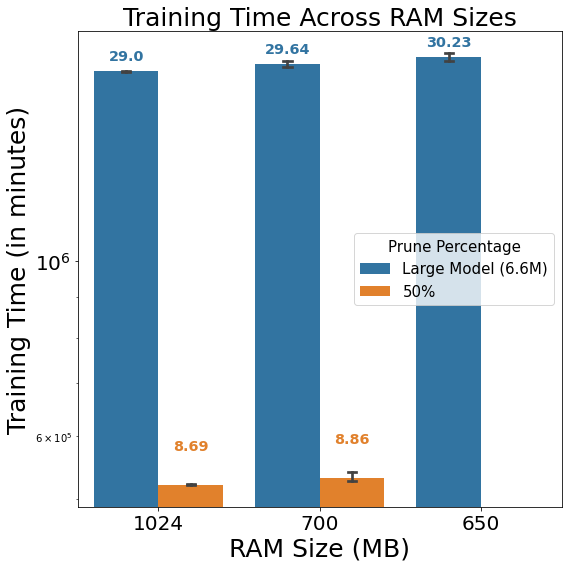

In [92]:
fig, ax = plt.subplots(figsize=(8,8))


bar_plot = sns.barplot(x="ram_size",y="total_train_time",data=combined_frame, hue="prune_percentage",capsize=0.05)
bar_plot.set_yscale("log")
bar_plot.set_ylabel('Training Time in Milliseconds')
bar_plot.set_xlabel('RAM Size')
bar_plot.legend_.texts[0].set_text('Prune Percentage')
              
bar_plot.legend(title="Prune Percentage", fontsize=15, title_fontsize = 15)
bar_plot.set_title('Training Time Across RAM Sizes', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_ylabel('Training Time (in minutes)', fontsize=25)
ax.set_xlabel('RAM Size (MB)', fontsize=25)
plt.tight_layout()

index = 0
for p in bar_plot.patches:
    if index == 0 or index == 1 or index == 2:
        offset = 0
    else:
        offset = p.get_height() * 0.07
        round(p.get_height(), 2)
    bar_plot.annotate(round(((p.get_height()/1000)/60),2) if np.isnan(p.get_height()) == False and p.get_height() != 0 else "asdf", 
                   (p.get_x() + p.get_width() / 2., p.get_height() + offset), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 15), 
                   textcoords = 'offset points', color=p.get_facecolor(),weight='bold', size='x-large')    
    index += 1
plt.savefig('barplot_ci_training_time_combined_ram.png')

In [97]:
accuracies = []

fpath = f'system_heterogeneity/RAM/'
fedavg_1gb = fpath + 'metrics_stat_testbed_1gb.csv'
hasaas_1gb_pruned = fpath + 'metrics_stat_testbed_1gb_pruned.csv'

fedavg_700mb = fpath + 'metrics_stat_testbed_700mb.csv'
hasaas_700mb_pruned = fpath + 'metrics_stat_testbed_700mb_pruned.csv'

fedavg_650mb = fpath + 'metrics_stat_testbed_650mb.csv'

file_fedavg_1gb = visualization_utils.load_data(fedavg_1gb)
file_hasaas_1gb_pruned = visualization_utils.load_data(hasaas_1gb_pruned)

file_fedavg_700mb = visualization_utils.load_data(fedavg_700mb)
file_hasaas_700mb_pruned = visualization_utils.load_data(hasaas_700mb_pruned)

file_fedavg_650mb = visualization_utils.load_data(fedavg_650mb)

accuracy_fedavg_1gb,_, _ = get_accuracy_vs_round_number(file_fedavg_1gb, True)
accuracy_hasaas_1gb_pruned,_, _ = get_accuracy_vs_round_number(file_hasaas_1gb_pruned, True)

accuracy_fedavg_700mb,_, _ = get_accuracy_vs_round_number(file_fedavg_700mb, True)
accuracy_hasaas_700mb_pruned,_, _ = get_accuracy_vs_round_number(file_hasaas_700mb_pruned, True)

accuracy_fedavg_650mb,_, _ = get_accuracy_vs_round_number(file_fedavg_650mb, True)

In [98]:
fedavg_1gb_rows_until_20= file_fedavg_1gb.loc[(file_fedavg_1gb['is_slow'] == 1) & (file_fedavg_1gb['round_number'] <= 20)]
hasaas_1gb_pruned_rows_until_20= file_hasaas_1gb_pruned.loc[(file_hasaas_1gb_pruned['is_slow'] == 1) & (file_hasaas_1gb_pruned['round_number'] <= 20)]
fedavg_700mb_rows_until_20= file_fedavg_700mb.loc[(file_fedavg_700mb['is_slow'] == 1) & (file_fedavg_700mb['round_number'] <= 20)]
hasaas_700mb_pruned_rows_until_20= file_hasaas_700mb_pruned.loc[(file_hasaas_700mb_pruned['is_slow'] == 1) & (file_hasaas_700mb_pruned['round_number'] <= 20)]

fedavg_650mb_rows_until_20= file_fedavg_650mb.loc[(file_fedavg_650mb['is_slow'] == 1) & (file_fedavg_650mb['round_number'] <= 20)]

In [99]:
x_coordinates = [] # Test Accuracy
y_coordinates = [] # Training Time
markers = []
labels = []

convergence_time_fedavg = np.sum(((fedavg_1gb_rows_until_20['round_completion_time']) / 60) / 60)

x_coordinates.append(accuracy_fedavg_1gb.iloc[-1]['accuracy'] * 100)
y_coordinates.append(convergence_time_fedavg)
markers.append("o")
labels.append("FedAvg (1 GB)")


convergence_time_hasaas_1gb_pruned = np.sum(((hasaas_1gb_pruned_rows_until_20['round_completion_time']) / 60) / 60)

x_coordinates.append(accuracy_hasaas_1gb_pruned.iloc[-1]['accuracy'] * 100)
y_coordinates.append(convergence_time_hasaas_1gb_pruned)
markers.append("^")
labels.append("Hasaas (50% Pruned & 1GB)")


convergence_time_fedavg_700mb = np.sum(((fedavg_700mb_rows_until_20['round_completion_time']) / 60) / 60)

x_coordinates.append(accuracy_fedavg_700mb.iloc[-1]['accuracy'] * 100)
y_coordinates.append(convergence_time_fedavg_700mb)
markers.append(">")
labels.append("FedAvg (700 MB)")

convergence_time_hasaas_700mb_pruned = np.sum(((hasaas_700mb_pruned_rows_until_20['round_completion_time']) / 60) / 60)

x_coordinates.append(accuracy_hasaas_700mb_pruned.iloc[-1]['accuracy'] * 100)
y_coordinates.append(convergence_time_hasaas_700mb_pruned)
markers.append("v")
labels.append("Hasaas (50% Pruned & 700MB)")

convergence_time_fedavg_650mb = np.sum(((fedavg_650mb_rows_until_20['round_completion_time']) / 60) / 60)

x_coordinates.append(accuracy_fedavg_650mb.iloc[-1]['accuracy'] * 100)
y_coordinates.append(convergence_time_fedavg_650mb)
markers.append("x")
labels.append("FedAvg (650 MB)")

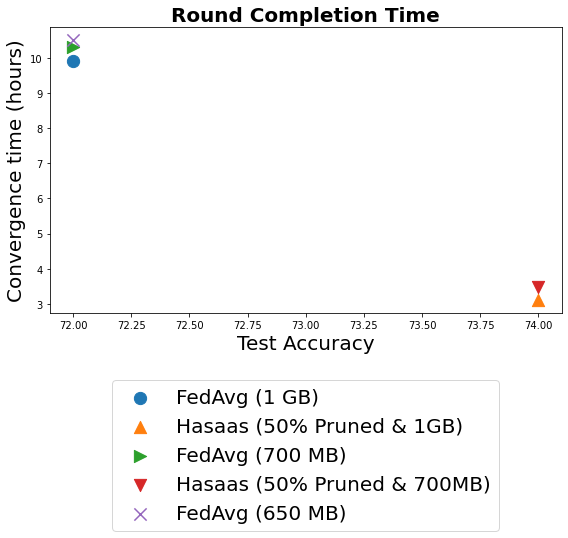

In [100]:
fig = plt.figure(figsize=(8,8))
#'FedAvg (4 Cores & Large)', 'FedAvg (4 Cores & 30%)', 'FedAvg (4 Cores & 50%)', 'FedAvg (4 Cores & 70%)'

fig.set_facecolor('white')
handles = []
for index, (xp, yp, m) in enumerate(zip(x_coordinates, y_coordinates, markers)):
    handle = plt.scatter(xp, yp, s=150, marker=m)
    handles.append(handle)
plt.xlabel("Test Accuracy", fontsize=20)
plt.ylabel("Convergence time (hours)", fontsize=20)
plt.title("Round Completion Time", fontsize=20, fontweight='bold')
    
plt.legend(handles = handles , labels=labels,loc='upper center', bbox_to_anchor=(0.5, -0.2),fancybox=True, shadow=False, fontsize=20)
plt.tight_layout()
plt.show()
# plt.savefig("fedavg_hasaas_convergence_time.png", transparent=False)